# (A) Dependencies

In [1]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# (B) Dataset

## Getting the Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [2]:
# Download kaggle api
!pip install -q kaggle

In [3]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [4]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [5]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [6]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# downloading the dataset via kaggle api 
!kaggle datasets download -d uciml/sms-spam-collection-dataset

100% 211k/211k [00:00<00:00, 333kB/s]
100% 211k/211k [00:00<00:00, 333kB/s]


In [8]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [9]:
!ls

sample_data  sms-spam-collection-dataset.zip  spam.csv


### Loading the dataset

In [10]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# renaming the columns
df = df[['v2', 'v1']]
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})

In [12]:
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


### Dataset Information

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

## Attributes

- SMS Messages
- Label (spam/ham)

### Attributes & Stats of the dataset

In [13]:
# Dataset information (record size, variables, non-null counts, dtypes  etc...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   messages  5572 non-null   object
 1   label     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
# Descriptive stats of the dataset
df.describe().T

,count,unique,top,freq
messages,5572,5169,"Sorry, I'll call later",30
label,5572,2,ham,4825


In [15]:
# Distribution of target variable's classes
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: >

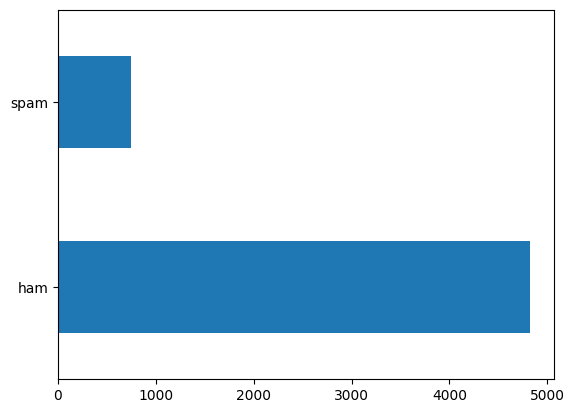

In [16]:
df["label"].value_counts().plot(kind="barh")

# (C) Preprocessing the dataset

## Adjustments

### Adjusting dtypes for categorical data

In [17]:
for col in df.select_dtypes(include=("object")).columns: df[col] = df[col].astype("category")

In [18]:
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

### Feature engineering

In [19]:
df['messages_len'] = df["messages"].apply(len)

## (1) Missing Value 

### Finding out the missing values

In [20]:
# find the null values
df.isnull().sum()

messages        0
label           0
messages_len    0
dtype: int64

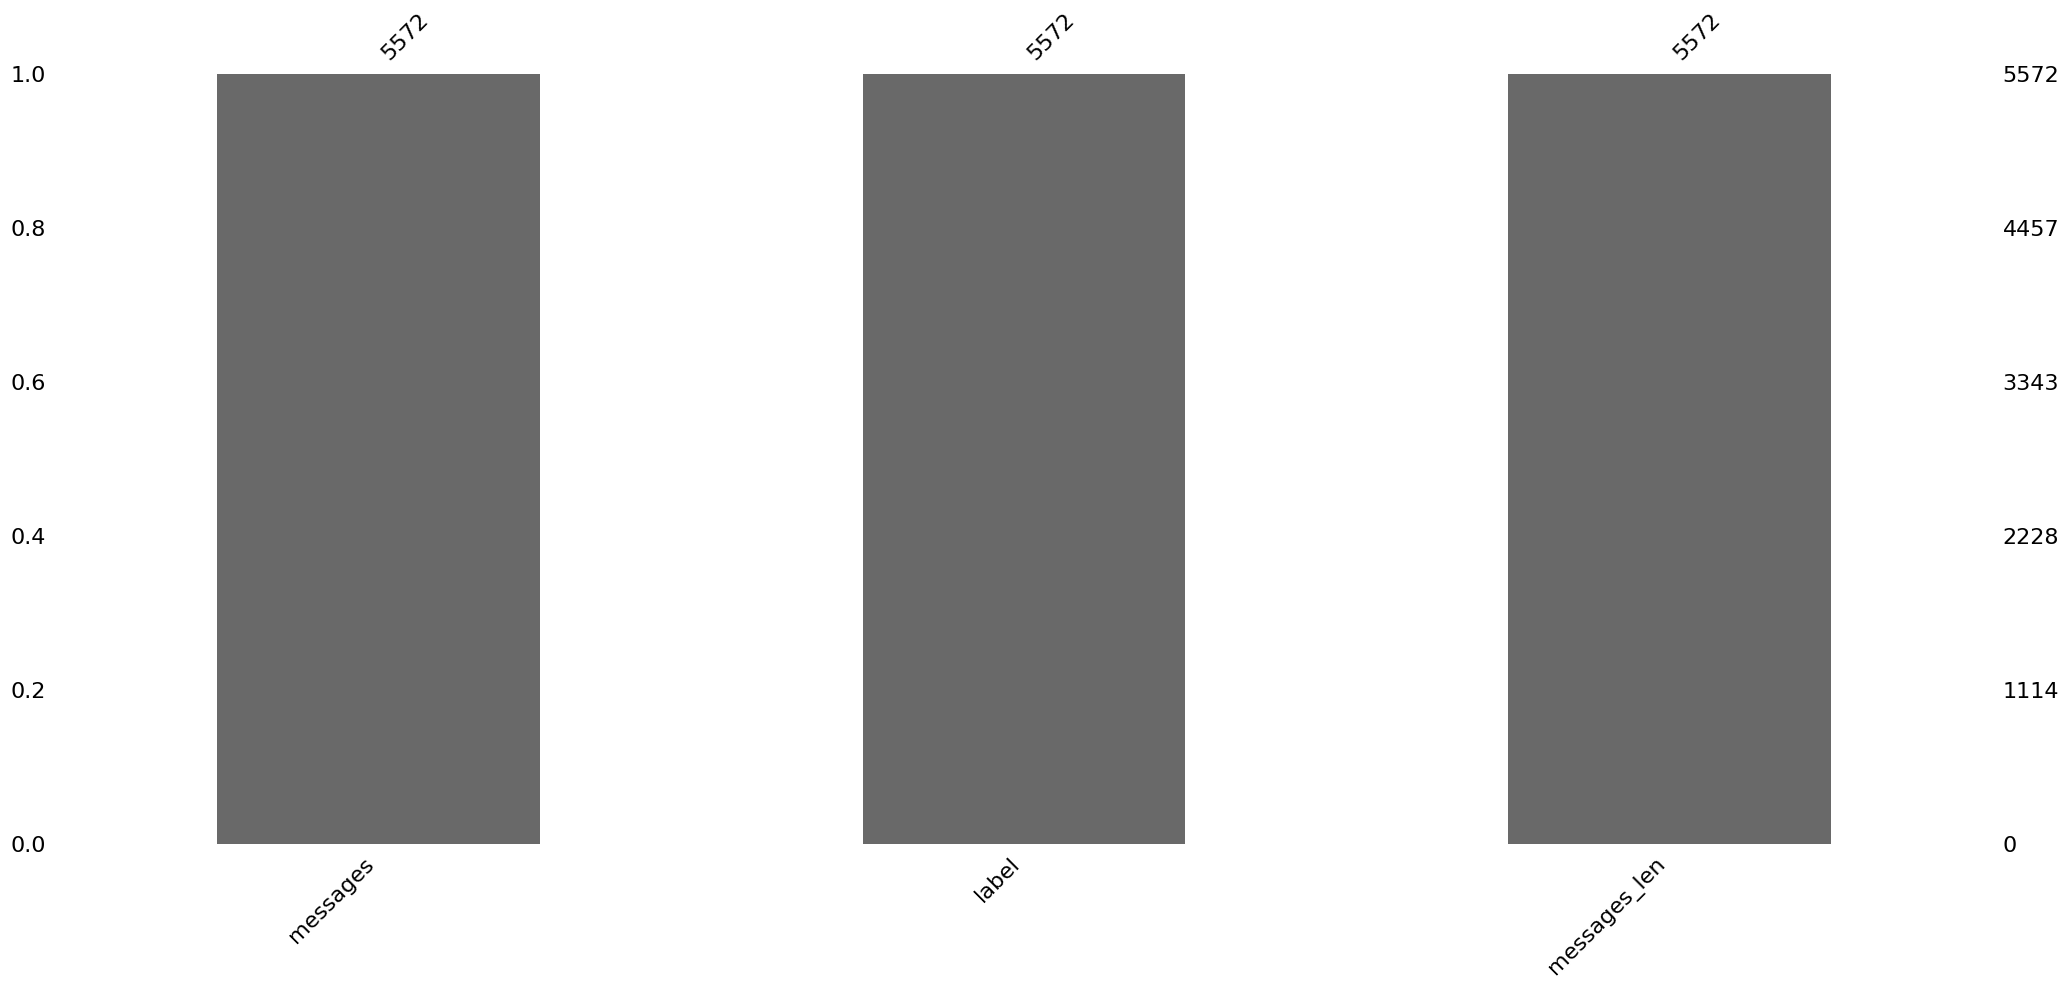

In [21]:
import missingno as msno
msno.bar(df);

<Axes: >

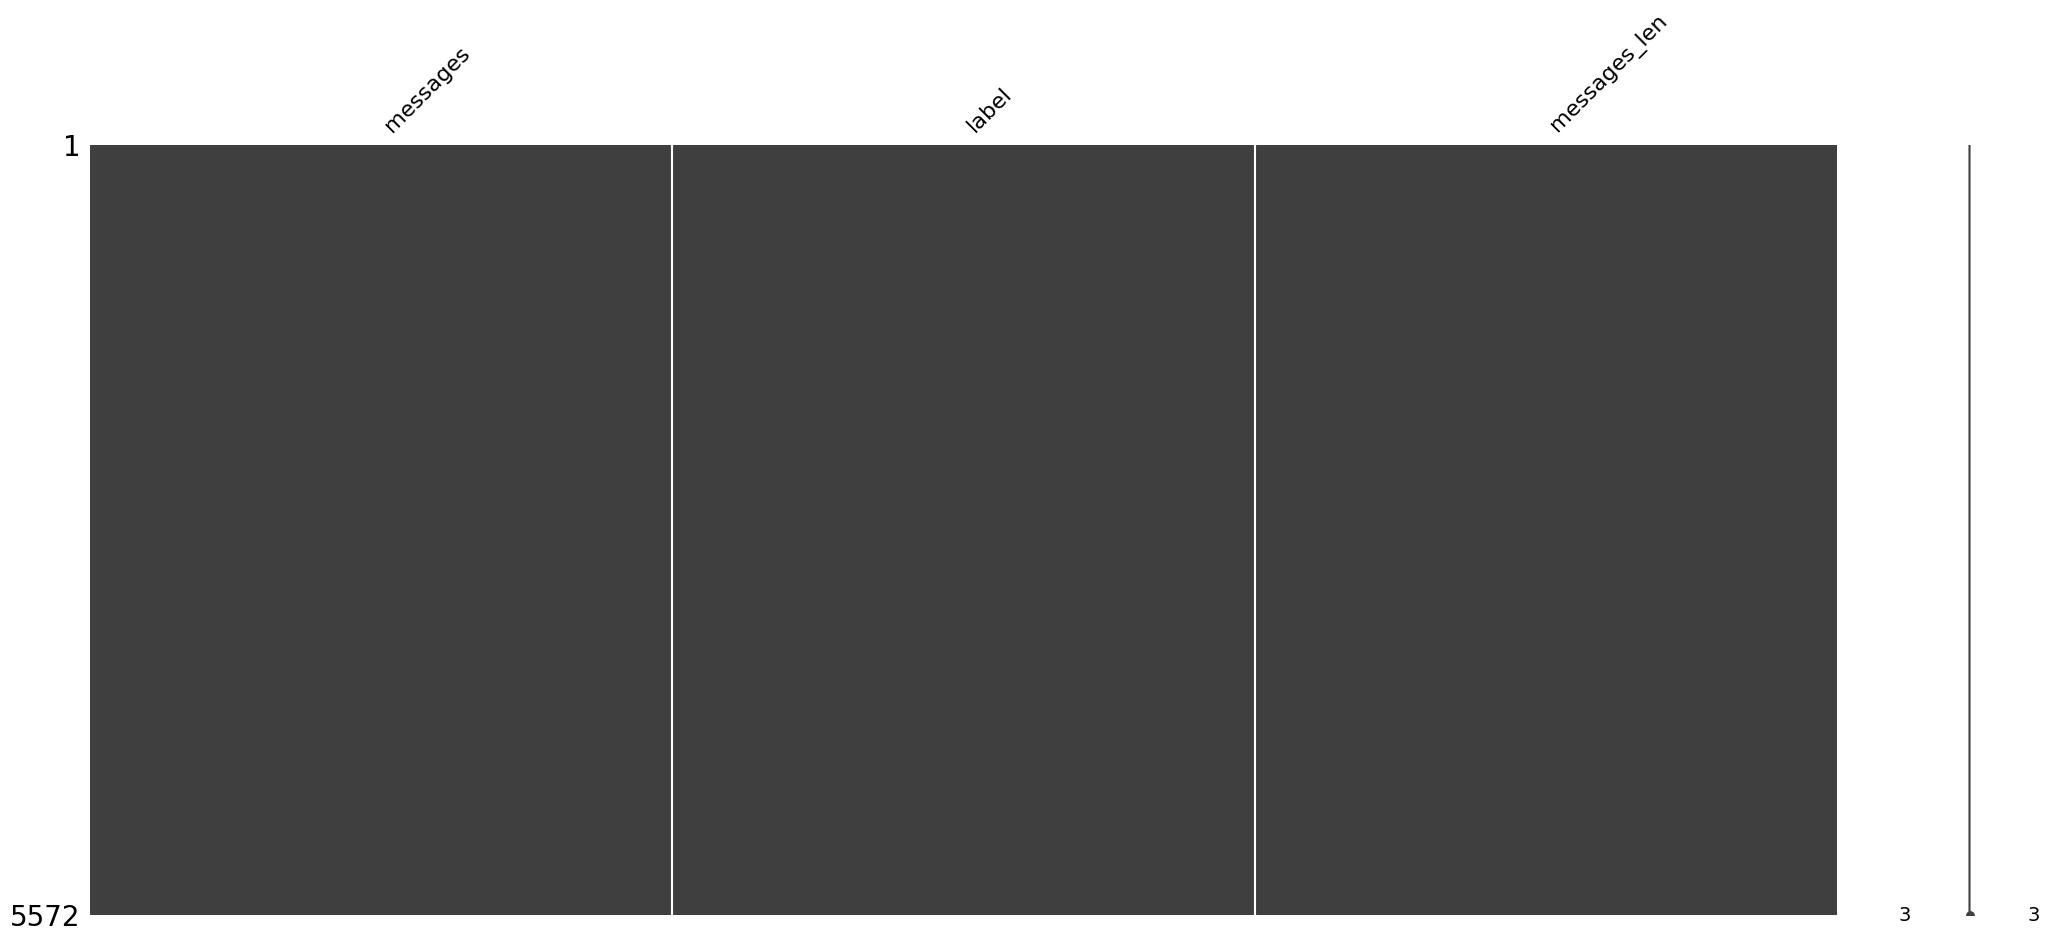

In [22]:
msno.matrix(df)

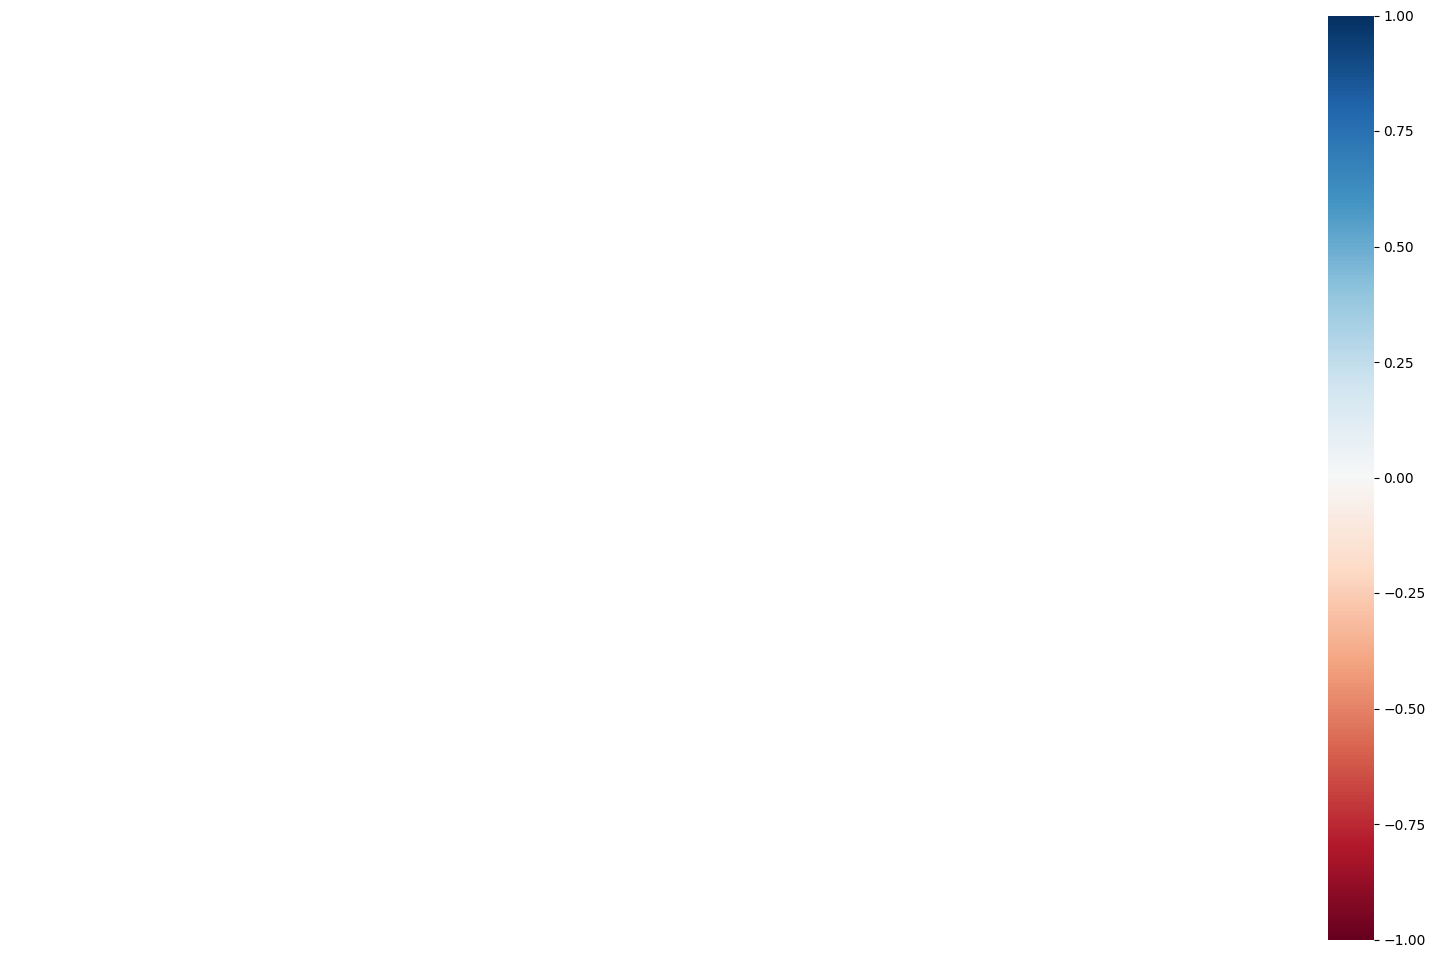

In [23]:
msno.heatmap(df);

### Handling The Missing Values
- There is no missing value

## (2) Text Processing

### Cleaning the text

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [26]:
import string
from nltk.corpus import stopwords

def text_process(text):

    # getting the stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # selecting non puction words
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # clearning and joining the words to create text
    clean_text = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    
    return clean_text

In [27]:
# clean the messages
df['clean_text'] = df['messages'].apply(text_process)
df.head()

,messages,label,messages_len,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,111,Go jurong point crazy Available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,29,Ok lar Joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155,Free entry wkly comp win FA Cup final tkts 21s...
3,U dun say so early hor... U c already then say...,ham,49,dun say early hor c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,61,Nah think goes usf lives around though


# (D) Exploratory Data Analysis

Text(0.5, 1.0, 'Message lengths')

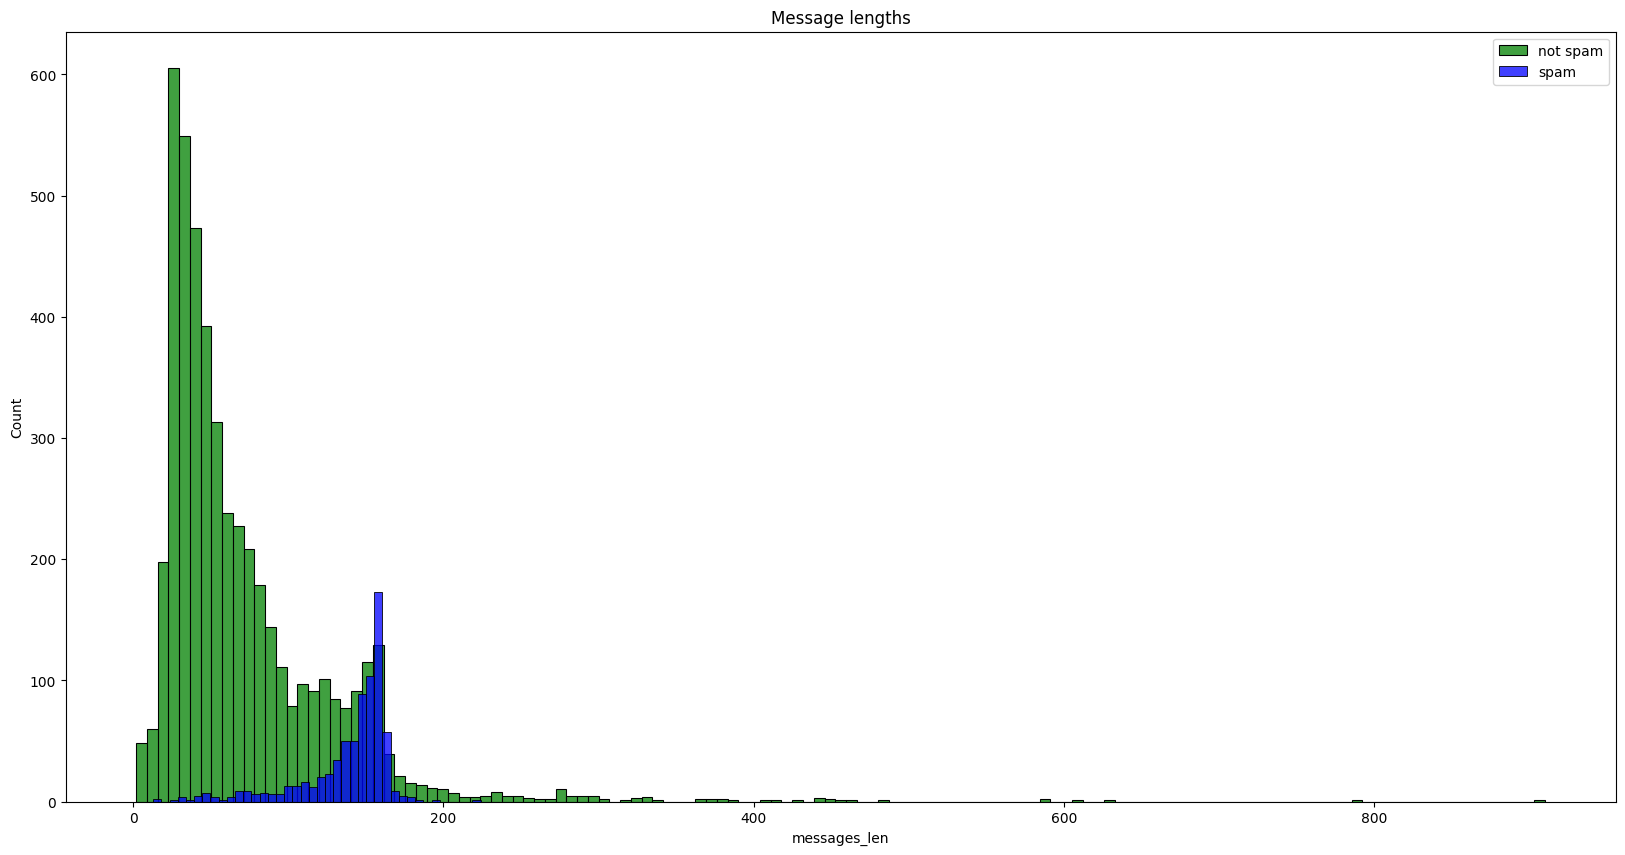

In [28]:
plt.figure(figsize=(20,10))
sns.histplot(df[df["label"]=='ham']["messages_len"], label="not spam", color="green")
sns.histplot(df[df["label"]=='spam']["messages_len"], label="spam", color="blue")
plt.legend()
plt.title("Message lengths")

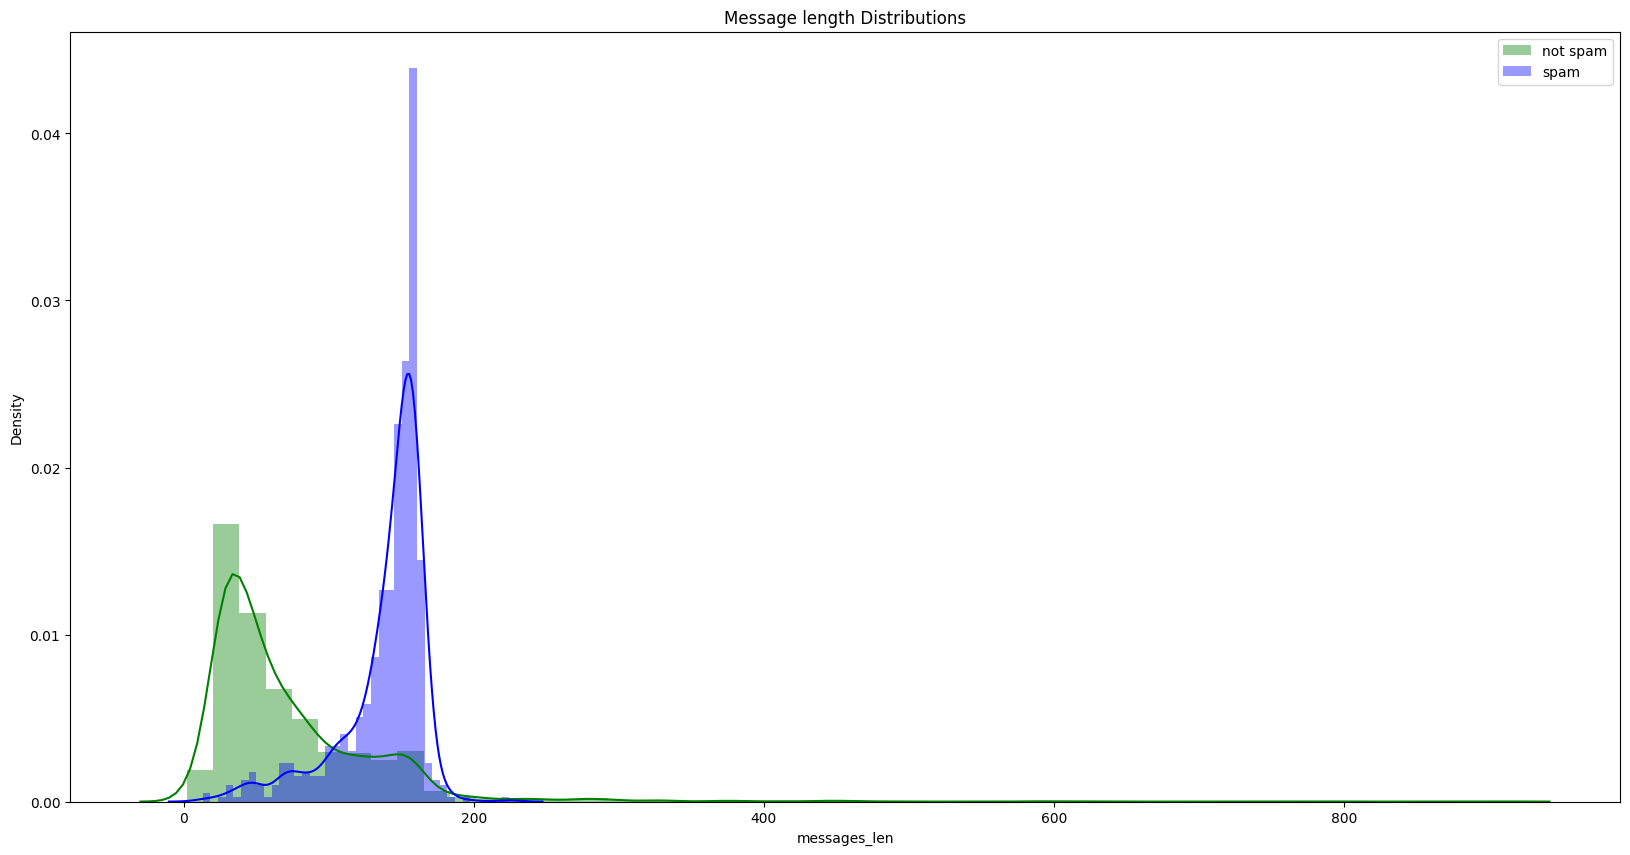

In [29]:
plt.figure(figsize=(20,10))
sns.distplot(df[df["label"]=='ham']["messages_len"], label="not spam", color="green")
sns.distplot(df[df["label"]=='spam']["messages_len"], label="spam", color="blue")
plt.legend()
plt.title("Message length Distributions");

## Frequencies

In [30]:
import os
if os.system("pip freeze | grep wordcloud==") != 0: os.system("pip install wordcloud")

#### Most Frequently used words

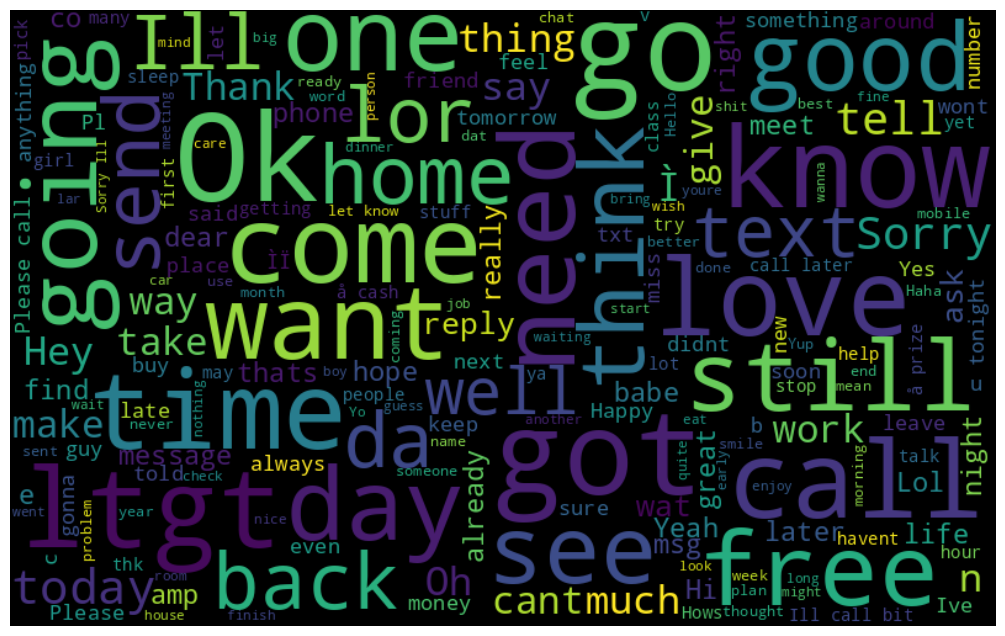

In [31]:
# Getting all the words as text to get worldcloud image.
all_words = " ".join([sentence for sentence in df['clean_text']])

# Generating a wordcloud image of the total words
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100)
all_words_image = wordcloud.generate(all_words)


# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(all_words_image, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Most Frequently used non-spam words

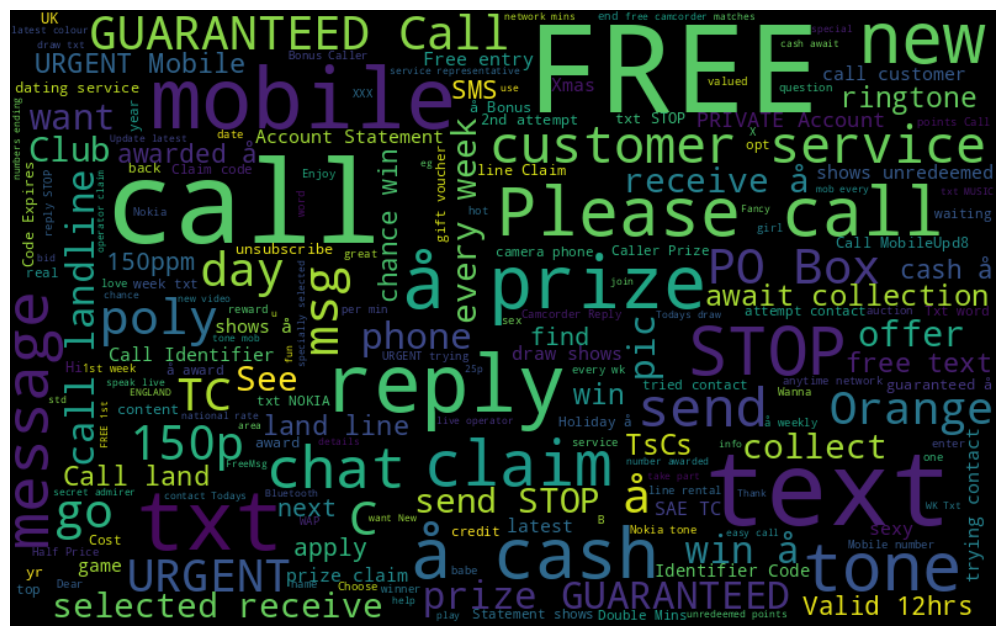

In [32]:
# Getting the text which includes all the negative words 
negative_words = " ".join([sentence for sentence in df['clean_text'][df['label']=="spam"]])

# Generating a wordcloud image from total of negative words text
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100)
negative_words_image = wordcloud.generate(negative_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
from collections import Counter

# Most Frequenly used smap words
words = df[df["label"]=='ham']["clean_text"].apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

# extracting the count
for msg in words:ham_words.update(msg)

# displaying the results    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


#### Most frequenlty used spam words

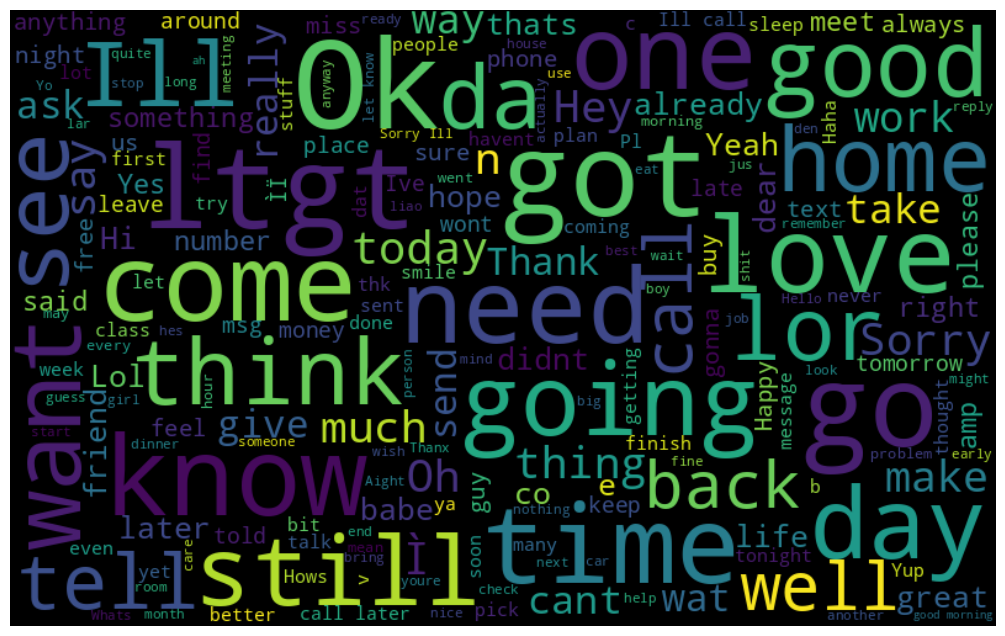

In [34]:
# Getting the text wtich includes all the positive words
positive_words = " ".join([sentence for sentence in df['clean_text'][df['label']=="ham"]])

# Creating a wordcloud image from positive words text
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100)
positive_words_image = wordcloud.generate(positive_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
# Most Frequenly used smap words
words = df[df["label"]=='spam']["clean_text"].apply(lambda x: [word.lower() for word in x.split()])

# extracting the count
from collections import Counter
spam_words = Counter()
for msg in words:spam_words.update(msg)

# displaying the results    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


# (E) Model Selection (Classic ML models)

## Prepare The Data To Training


### Vectorization

In [36]:
#df = df_spare

In [37]:
df_spare= df.copy()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vectorizer = CountVectorizer()

# Implementing vectoriation ğrpcess
bow_clean_text = vectorizer.fit_transform(df["clean_text"])

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

# instantiate the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Implementing feature extraction process (frequency)
tfidf_clean_text  = tfidf_transformer.fit_transform(bow_clean_text)

In [40]:
import pickle
pickle.dump(vectorizer, open('vectorizer', 'wb'))
pickle.dump(tfidf_transformer, open('tfidf_transformer', 'wb'))

In [41]:
from google.colab import files
files.download("vectorizer")
files.download("tfidf_transformer")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Target Encoding

In [42]:
encoding_map = {'ham':0, 'spam':1}

df['label'] = df["label"].map(encoding_map)

### Splitting the dataset
```python
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train, validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
```

#### Denoting the Features and target variable

In [43]:
X = tfidf_clean_text #df['clean_text']
y = df['label']

#### Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Util Functions
- Utils functions for model tuning

### Greedy Step tune

In [45]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def greedy_search(model, params:dict, X_train, y_train, cv=10, n_jobs=-1, verbose=2, is_print=False):
  """It tunes params individually step by step . select best value on current step.
  It assumes the params sorted by importance on the model as descending. 
  The important param, second important param, etc.... 
  """
  
  best_params = {}
  for name, values in params.items():
    # Initial params
    best_params[name] = values

    if is_print: print("before:");pprint(best_params);
    
    # create GridSearch&Train 
    cv_model = GridSearchCV(model, best_params, cv=cv, n_jobs=n_jobs, verbose=verbose)
    cv_model.fit(X_train, y_train)

    # Update the param
    best_params[name] = [cv_model.best_params_[name]]
    
    if is_print: print("after:");pprint(best_params);print("-"*25, end="\n\n");

  return cv_model, cv_model.best_estimator_, best_params

### Model Tuner

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


def gen_clf_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common classification metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)

  clf_metrics = {
            "accuracy":accuracy_score(y_test, y_pred),
            "precision" : precision_score(y_test, y_pred, average="micro"),
            "recall": recall_score(y_test, y_pred, average="micro"),
            "f1_score": f1_score(y_test, y_pred, average="micro"),
            "clf_report":classification_report(y_test, y_pred, output_dict=True)
  }

  if return_y_data:
    clf_metrics["y_pred"] = y_pred
    clf_metrics["y_test"] = y_test
            
  
  return clf_metrics

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error

def gen_reg_metrics(y_test, y_pred, is_round, return_y_data=False):
  """
  Calculate and return a dictionary of common regression metrics.
  """

  if is_round: y_pred = np.round(y_pred).astype(np.int64)


  reg_metrics = {
      "MaxError": np.max(y_test - y_pred),
      "MeanAbsoluteError": median_absolute_error(y_test, y_pred),
      "MeanAbsolutePercentageError": np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": mean_squared_error(y_test, y_pred, squared=False),
      "MAE": mean_absolute_error(y_test, y_pred),
      "R2":r2_score(y_test, y_pred),
      "ExplainedVariance":explained_variance_score(y_test, y_pred)
  }

  if return_y_data:
    reg_metrics["y_pred"] = y_pred
    reg_metrics["y_test"] = y_test


  return reg_metrics

In [48]:
import pandas as pd
def tune_models(tuners, X_train, y_train, X_test, y_test, is_clf, cv=10, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
    # Tuning
    cv_model, tuned_model, best_params = greedy_search(model, params, X_train, y_train, cv=cv)
    
    # predicting
    y_pred = tuned_model.predict(X_test)
    metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
    metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

    # Generating results
    cur_results = {
        "tune_results": {
            "cv_model":cv_model,
            "tuned_model":tuned_model,
            "best_params":best_params,
        },
        "metric_results": metric_results
    }
    
    results[name] = cur_results
    metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T


In [49]:
import pandas as pd
def tune_linear_cv_models(tuners, X_train, y_train, X_test, y_test, is_clf, is_round=False, return_y_data=False):
  
  results, metric_summary = dict(), dict()
  for name, [model, params] in tuners.items():
      # Tuning
      tuned_model = model(**params)
      tuned_model.fit(X_train, y_train)
      
      # predicting
      y_pred = tuned_model.predict(X_test)
      metric_kwargs = {"y_test":y_test, "y_pred":y_pred, "is_round":is_round, "return_y_data":return_y_data} 
      metric_results = gen_clf_metrics(**metric_kwargs) if is_clf else gen_reg_metrics(**metric_kwargs)

      # Generating results
      cur_results = {
          "tune_results": {
              "tuned_model":tuned_model,
              "best_params":tuned_model.get_params(True) ,#best_params_,
          },
          "metric_results": metric_results
      }
      
      results[name] = cur_results
      metric_summary[name] = metric_results

  return results, pd.DataFrame(metric_summary).T

### Learning Curve

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, name, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize=(20,20)):

    # checking the params
    if ylim is not None: plt.ylim(*ylim)
    
    # pre-declerations
    orange, blue = "#ff9124", "#2492ff"

    # Extracting the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Extracting the scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # calculating params    
    tra_left_edge = train_scores_mean - train_scores_std
    tra_right_edge = train_scores_mean + train_scores_std

    test_left_edge = test_scores_mean - test_scores_std
    test_right_edge = test_scores_mean + test_scores_std

    # transparent plot for confidence value range
    plt.fill_between(train_sizes, tra_left_edge, tra_right_edge, alpha=0.1, color=orange)
    plt.fill_between(train_sizes, test_left_edge, test_right_edge, alpha=0.1, color=blue)
    
    # Plotting as point
    plt.plot(train_sizes, train_scores_mean, 'o-', color=orange, label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=blue, label="Cross-validation score")
    
    # Configurating the plottings
    plt.title(f"{name} Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")

In [51]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

def get_learning_curve_stats(clfs, X_train, y_train, cv, model_size, rs, cs, figsize, ylim):

  plt.figure(figsize=figsize)
  # EXtracting the learning curve and validation metrics
  best_models_cross_val_preds, roc_auc_scores = {}, {}
  for i, (name, model) in enumerate(clfs.items()):

    # Training with best models again (the best params already saved inside) for visualizate the duration.
    plt.subplot(rs, cs, i+1)
    print(f"{i}.turn [{name}], plotting learning curve")
    plot_learning_curve(model, name, X_train, y_train, ylim, cv=cv, n_jobs=-1, figsize=figsize) 

    # validating the trained models
    #print(f"{i}.turn, cross_validation")
    #method = "decision_function" if name in ["loj_reg", "svc"] else "predict"
    #best_models_cross_val_preds[name]  = cross_val_predict(model, X_train, y_train, cv=5, method=method)

    # Displating the roc scores
    #print(f"{i}.turn, roc_auc_scores")
    #roc_auc_scores[name] = roc_auc_score(y_train, best_models_cross_val_preds[name])
    #print(f'{name:<20}: ',roc_auc_scores[name])

  return plt.gcf()#, best_models_cross_val_preds#, roc_auc_scores

```python
# Example Usage
model_size = len(us_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=100, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (40,20),
    "ylim" : (0.87, 1.01)
}

lc_plot, best_models_cross_val_preds, roc_auc_scores  = get_learning_curve_stats(us_models, figsize=(40,10), **lcs_params)
```

## (1) Linear Models

#### Hyperparams

In [52]:
lin_params = {
    'fit_intercept': [True, False],
    #'normalize': [True, False],
    #'copy_X': [True, False],
}
from sklearn.linear_model import LinearRegression
linear_reg = [LinearRegression(), lin_params]

In [53]:
lasso_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": [3, 5, 10],
    #"tol": [1e-4, 1e-3, 1e-2]
}
from sklearn.linear_model import LassoCV
l1_reg = [LassoCV, lasso_params] 

In [54]:
ridge_params = {
    "alphas": (10**np.linspace(10,-2,100))*0.5,
    #"scoring":"neg_mean_squared_error",
}

from sklearn.linear_model import RidgeClassifierCV 
l2_reg = [RidgeClassifierCV, ridge_params]

In [55]:
ElasticNet_params = {
    "alphas": np.logspace(-4, 0, 100),
    #"cv": 10, #[3, 5, 10],
    #"normalize": True#[True, False],
    #"tol": [1e-4, 1e-3, 1e-2]
}

from sklearn.linear_model import ElasticNetCV 
enet_reg = [ElasticNetCV, ElasticNet_params]

In [56]:
linear_cv_tuners = {
    "l1_reg":l1_reg,
    "l2_reg":l2_reg,
    "enet_reg":enet_reg
}
linear_tuners = {
    "lin_reg":linear_reg,
    #**linear_cv_tuners
}

#### Tuning Demostration

In [57]:
lin_results, lin_metric_summary = tune_linear_cv_models(linear_cv_tuners, X_train, y_train, X_test, y_test, is_clf=True, is_round=True)

In [58]:
list(lin_results.keys())

['l1_reg', 'l2_reg', 'enet_reg']

In [59]:
lin_metric_summary

,accuracy,precision,recall,f1_score,clf_report
l1_reg,0.964126,0.964126,0.964126,0.964126,"{'0': {'precision': 0.9658976930792377, 'recal..."
l2_reg,0.980269,0.980269,0.980269,0.980269,"{'0': {'precision': 0.978744939271255, 'recall..."
enet_reg,0.973094,0.973094,0.973094,0.973094,"{'0': {'precision': 0.9727822580645161, 'recal..."


In [60]:
from pprint import pprint
pprint(lin_results)

{'enet_reg': {'metric_results': {'accuracy': 0.9730941704035875,
                                 'clf_report': {'0': {'f1-score': 0.9846938775510203,
                                                      'precision': 0.9727822580645161,
                                                      'recall': 0.996900826446281,
                                                      'support': 968},
                                                '1': {'f1-score': 0.888888888888889,
                                                      'precision': 0.975609756097561,
                                                      'recall': 0.8163265306122449,
                                                      'support': 147},
                                                'accuracy': 0.9730941704035875,
                                                'macro avg': {'f1-score': 0.9367913832199546,
                                                              'precision': 0.9741960070810385,
             

In [61]:
#tuned_model
lin_results.keys()

dict_keys(['l1_reg', 'l2_reg', 'enet_reg'])

In [62]:
lin_results["l1_reg"].keys()

dict_keys(['tune_results', 'metric_results'])

In [63]:
lin_results["l1_reg"]["tune_results"].keys()

dict_keys(['tuned_model', 'best_params'])

In [64]:
size = len(lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*20))
lin_models = {}
for i, model_name in enumerate(lin_results.keys()):

  cur_model = lin_results[model_name]["tune_results"]["tuned_model"]
  lin_models[model_name] = cur_model
  
  if model_name in ["LassoCV"]:continue

<Figure size 6000x4000 with 0 Axes>

0.turn [l1_reg], plotting learning curve
1.turn [l2_reg], plotting learning curve
2.turn [enet_reg], plotting learning curve


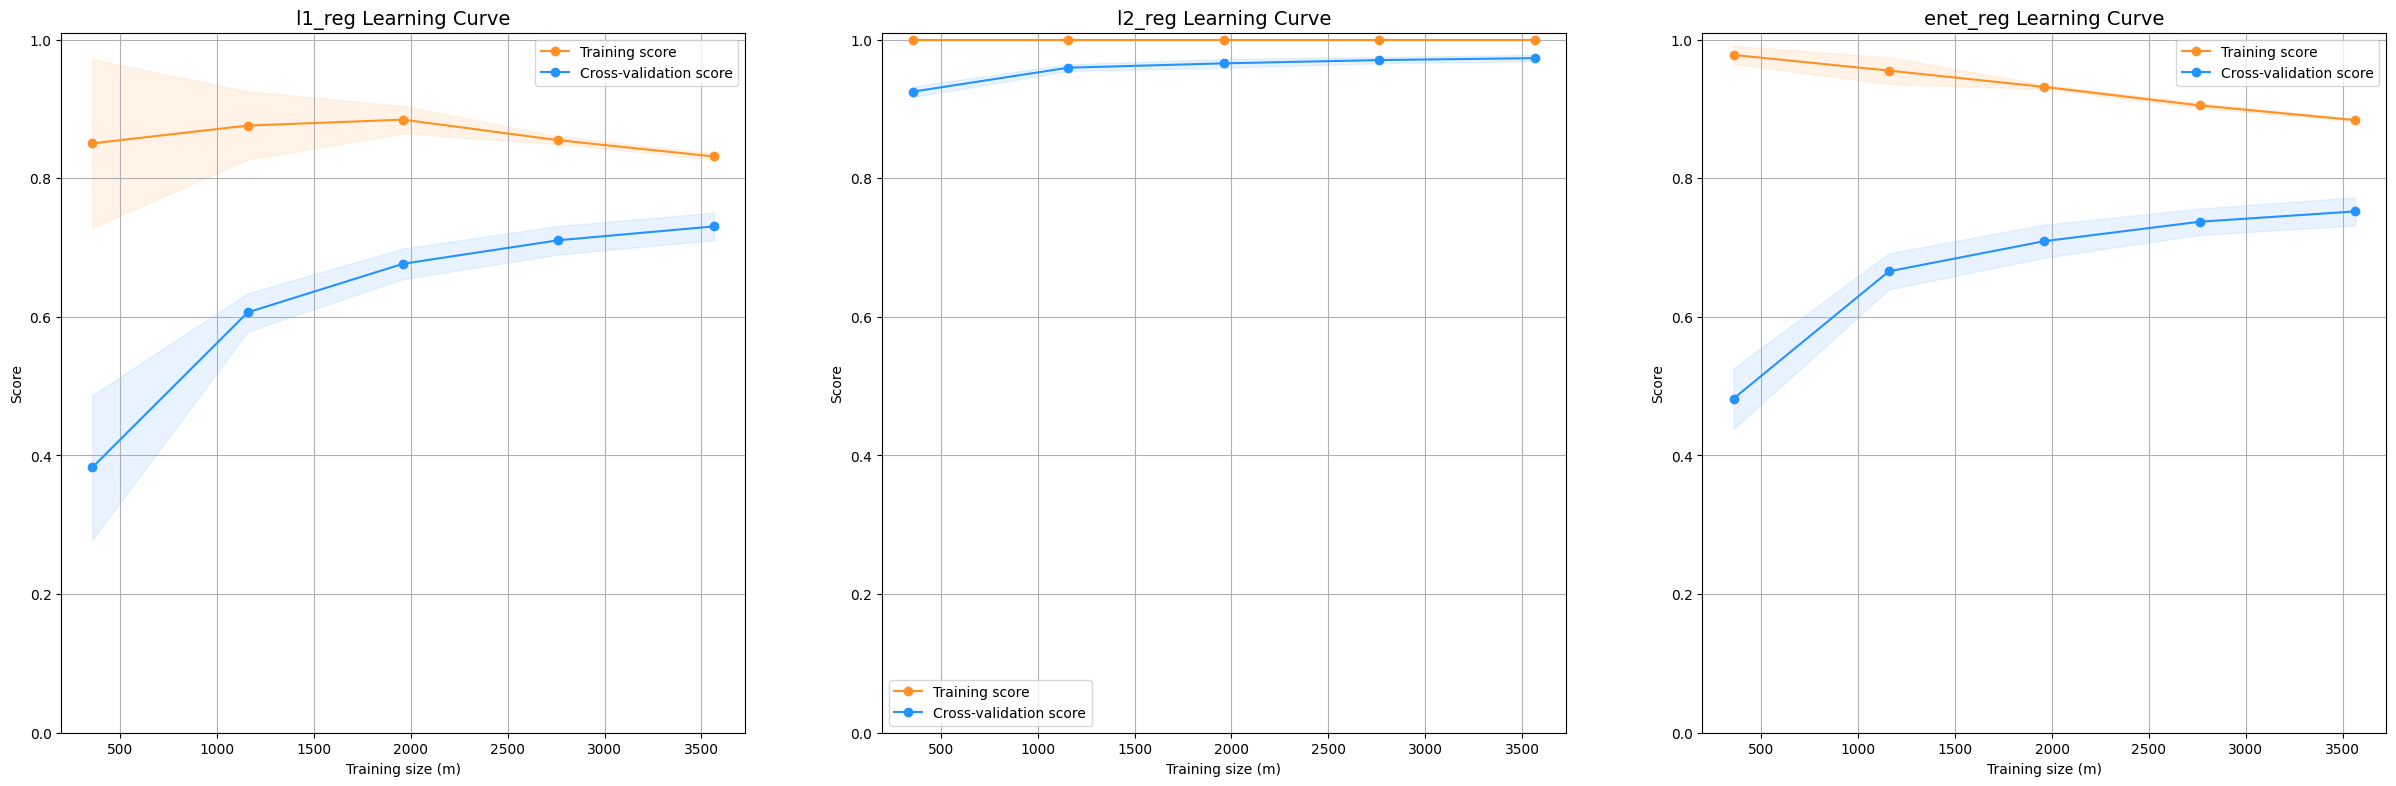

In [65]:
# Example Usage
model_size = len(lin_models)
rs, cs = (model_size//3+1, 3 ) if model_size >= 3 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_models, X_train, y_train,  **lcs_params)

In [66]:
lin_reg_results, lin_reg_metric_summary = tune_models(linear_tuners, X_train, y_train, X_test, y_test, is_clf=True, is_round=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [67]:
list(lin_reg_results.keys())

['lin_reg']

In [68]:
lin_reg_metric_summary

,accuracy,clf_report,f1_score,precision,recall
lin_reg,0.970404,"{'-1': {'precision': 0.0, 'recall': 0.0, 'f1-s...",0.970404,0.970404,0.970404


In [69]:
from pprint import pprint
pprint(lin_reg_results)

{'lin_reg': {'metric_results': {'accuracy': 0.9704035874439462,
                                'clf_report': {'-1': {'f1-score': 0.0,
                                                      'precision': 0.0,
                                                      'recall': 0.0,
                                                      'support': 0},
                                               '0': {'f1-score': 0.983206106870229,
                                                     'precision': 0.9689067201604814,
                                                     'recall': 0.9979338842975206,
                                                     'support': 968},
                                               '1': {'f1-score': 0.8787878787878788,
                                                     'precision': 0.9914529914529915,
                                                     'recall': 0.7891156462585034,
                                                     'support': 147},
        

In [74]:
size = len(lin_results.keys())
rs, cs = (size//5+1, 5) if size>=5 else (size//3+1, 3)

plt.figure(figsize=(cs*20, rs*20))
lin_reg_models = {}
for i, model_name in enumerate(lin_reg_results.keys()):

  cur_model = lin_reg_results[model_name]["tune_results"]["cv_model"]
  lin_reg_models[model_name] = cur_model
  

<Figure size 6000x4000 with 0 Axes>

0.turn [lin_reg], plotting learning curve


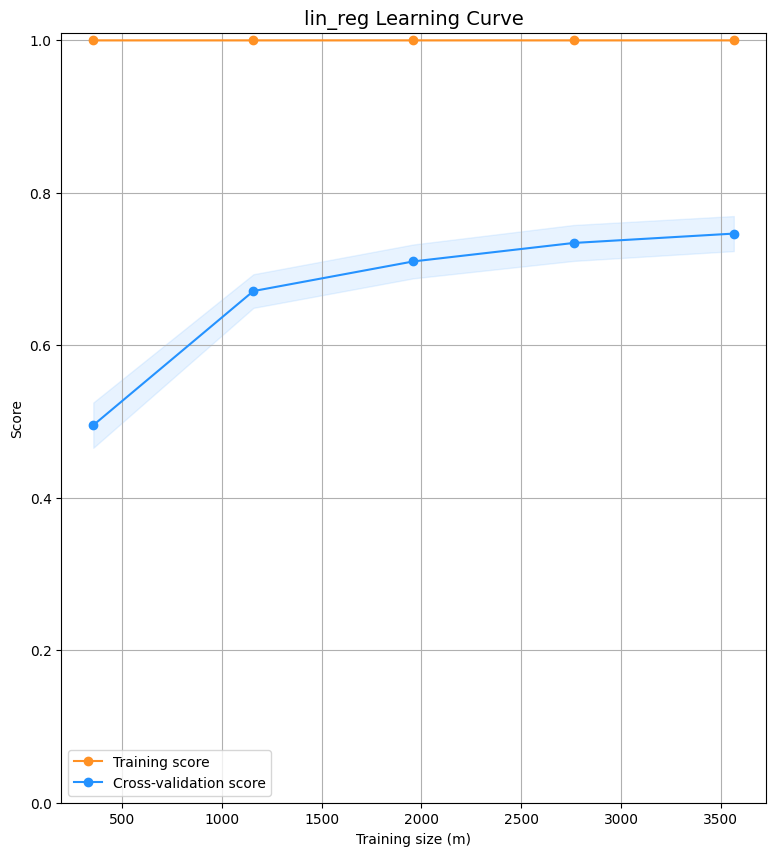

In [75]:
# Example Usage
model_size = len(lin_reg_models)
rs, cs = (model_size//2+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(lin_reg_models, X_train, y_train,  **lcs_params)

## (2) Non-Linear Models 

#### Hyperparams

In [76]:
loj_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'max_iter': [100, 200, 300, 400, 500],
    #'fit_intercept': [True, False],
    #'intercept_scaling': [0.5, 1, 2]
}
from sklearn.linear_model import LogisticRegression
loj_reg = [LogisticRegression(), loj_params]

In [77]:
nb_params = {
    #"priors": [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]],
    "var_smoothing":  np.linspace(1e-6, 1e-12, 10)
}
from sklearn.naive_bayes import GaussianNB
nb = [GaussianNB(), nb_params]

In [78]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    #'weights': ['uniform', 'distance'],
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    #'p': [1, 2, 3, 4, 5],
}
from sklearn.neighbors import KNeighborsClassifier
knn = [KNeighborsClassifier() , knn_params]

In [79]:
svc_params = {
    'C': np.logspace(-3, 3, 7),
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'degree': [2, 3, 4, 5],
    #'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    #'coef0': [-1, 0, 1],
    #'shrinking': [True, False],
    #'probability': [True, False],
    #'tol': [1e-3, 1e-4, 1e-5],
    #'max_iter': [-1, 1000, 10000, 100000],
    #"class_weight": [None, "balanced"]
}
from sklearn.svm import SVC
svc = [SVC() , svc_params]

In [80]:
dt_params = {
    #"max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    #"max_features": [None, "auto", "log2"],
    #"class_weight": [None, "balanced"]
}
from sklearn.tree import DecisionTreeClassifier
dt = [DecisionTreeClassifier() , dt_params]

In [81]:
non_linear_tuners = {
    "loj_reg":loj_reg,
    #"nb_params":nb,
    "knn":knn,
    #"svc":svc,
    "dt":dt
}

#### Tuning Demostration


In [82]:
non_lin_results, non_lin_metric_summary = tune_models(non_linear_tuners, X_train, y_train, X_test, y_test, is_clf=True)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [83]:
list(non_lin_results.keys())

['loj_reg', 'knn', 'dt']

In [84]:
non_lin_metric_summary

,accuracy,precision,recall,f1_score,clf_report
loj_reg,0.981166,0.981166,0.981166,0.981166,"{'0': {'precision': 0.984646878198567, 'recall..."
knn,0.925561,0.925561,0.925561,0.925561,"{'0': {'precision': 0.9210275927687916, 'recal..."
dt,0.962332,0.962332,0.962332,0.962332,"{'0': {'precision': 0.979296066252588, 'recall..."


In [85]:
from pprint import pprint
pprint(non_lin_results)

{'dt': {'metric_results': {'accuracy': 0.9623318385650225,
                           'clf_report': {'0': {'f1-score': 0.9782833505687695,
                                                'precision': 0.979296066252588,
                                                'recall': 0.9772727272727273,
                                                'support': 968},
                                          '1': {'f1-score': 0.8581081081081081,
                                                'precision': 0.8523489932885906,
                                                'recall': 0.8639455782312925,
                                                'support': 147},
                                          'accuracy': 0.9623318385650225,
                                          'macro avg': {'f1-score': 0.9181957293384388,
                                                        'precision': 0.9158225297705893,
                                                        'recall': 0.920609152752009

In [86]:
non_lin_reg_models = {model_name:results["tune_results"]["tuned_model"] for model_name, results in non_lin_results.items() if model_name not in ["knn"]}

In [87]:
non_lin_reg_models

{'loj_reg': LogisticRegression(C=0.001, penalty='none'),
 'dt': DecisionTreeClassifier(min_samples_split=5, splitter='random')}

0.turn [loj_reg], plotting learning curve
1.turn [dt], plotting learning curve


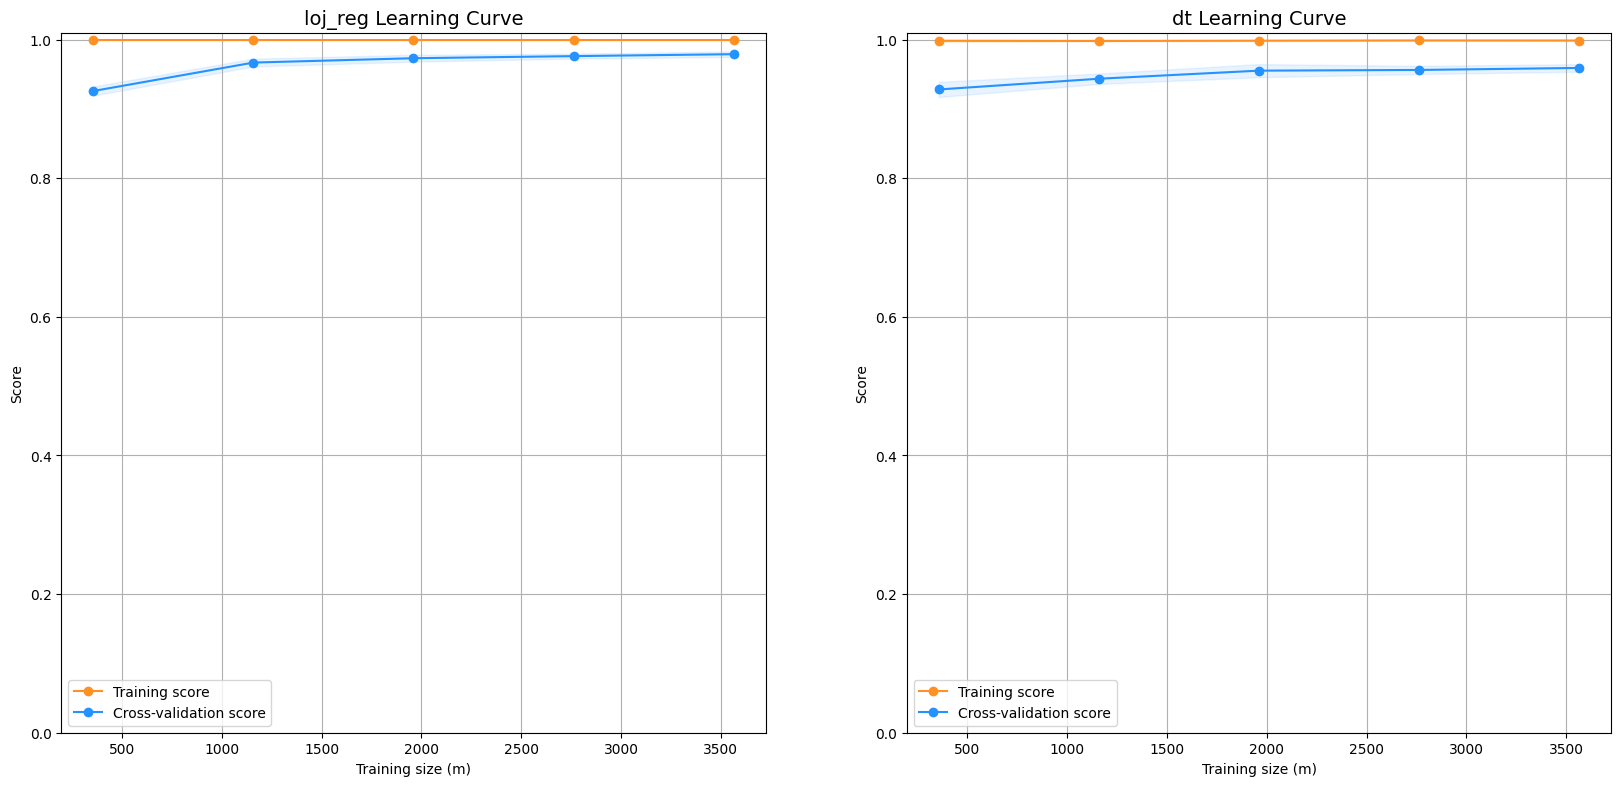

In [88]:
# Example Usage
model_size = len(non_lin_reg_models)
rs, cs = (model_size//4+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(non_lin_reg_models, X_train, y_train,  **lcs_params)

## (3) Ensemble Models

#### Hyperparams

In [89]:
# Defining parameters
rf_params = {
    #"n_estimators": [10, 50, 100, 200],
    "criterion": ["gini", "entropy"],
    #"max_depth": [3, 5, 7, None],
    #"min_samples_split": [2, 4],
    #"min_samples_leaf": [2, 4],
    #"max_features": [None, "auto", "log2"],
    #"class_weight": [None, "balanced"],
    #"bootstrap": [True, False],
    #"oob_score": [True, False],
    #"n_jobs": [None, -1, 1]
}
from sklearn.ensemble import RandomForestClassifier
rf = [RandomForestClassifier(), rf_params] 

In [90]:
# Defining parameters
gbc_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7],
    #'min_samples_split': [2, 4, 6],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'subsample': [0.7, 0.8, 0.9]
}
from sklearn.ensemble import GradientBoostingClassifier
gbc = [GradientBoostingClassifier(), gbc_params] 

In [91]:
# Defining parameters
xgbc_params = {
    #'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'max_depth': [3, 5, 7],
    #'min_child_weight': [1, 2, 4],
    #'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from xgboost import XGBClassifier
xgbc = [XGBClassifier(), xgbc_params] 

In [92]:
# Defining parameters
lgbm_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'num_leaves': [31, 63, 127],
    #'max_depth': [3, 5, 7],
    #'min_child_samples': [10, 20, 30],
    #'min_child_weight': [1e-3, 1e-2, 1e-1],
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'reg_alpha': [0, 1e-1, 1],
    #'reg_lambda': [0, 1e-1, 1]
}
from lightgbm import LGBMClassifier
lgbm = [LGBMClassifier(), lgbm_params] 

In [93]:
!pip install catboost
import os
if os.system("pip freeze | grep catboost==") != 0: os.system("pip install catboost")

cb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    #'n_estimators': [100, 200, 300],
    #'depth': [3, 5, 7],
    #'l2_leaf_reg': [1, 2, 4],
    #'boosting_type': ['Ordered', 'Plain', 'Pointwise'],
    #'colsample_bylevel': [0.7, 0.8, 0.9],
    #'reg_lambda': [0, 1e-1, 1] # or # 'l2_leaf_reg': [1, 2, 4]
}
from catboost import CatBoostClassifier
cb = [CatBoostClassifier(), cb_params] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.2 MB/s eta 0:00:00


In [94]:
ensemble_tuners = {
    "rf":rf,
    "gbc":gbc,
    "xgbc":xgbc,
    "lgbm":lgbm,
    "cb":cb
}

#### Tuning Demostration (Undersampled Data)
- X_train_us, y_train_us

In [95]:
ensemble_results, ensemble_metric_summary = tune_models(ensemble_tuners, X_train, y_train, X_test, y_test, is_clf=True)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
0:	learn: 0.5914803	total: 94ms	remaining: 1m 33s
1:	learn: 0.5195649	total: 133ms	remaining: 1m 6s
2:	learn: 0.4582650	total: 175ms	remaining: 58.1s
3:	learn: 0.4029033	total: 214ms	remaining: 53.2s
4:	learn: 0.3662897	total: 253ms	remaining: 50.3s
5:	learn: 0.3365416	total: 291ms	remaining: 48.2s
6:	learn: 0.3120279	total: 340ms	remaining: 48.2s
7:	learn: 0.2836127	total: 379ms	remaining: 47s
8:	learn: 0.2642547	total: 418ms	remaining: 46.1s
9:	learn: 0.2487781	total: 460ms	remaining: 45.5s
10:	learn: 0.2347997	total: 503ms	remaining: 45.3s
11:	learn: 0.2244262	total: 546ms	remaining: 45s
12:	learn: 0.2130068	total: 585ms	remaining: 44.4s
13:	learn: 0.2064010	total: 623ms	remaining: 4

In [96]:
list(ensemble_results)

['rf', 'gbc', 'xgbc', 'lgbm', 'cb']

In [97]:
ensemble_metric_summary

,accuracy,precision,recall,f1_score,clf_report
rf,0.98296,0.98296,0.98296,0.98296,"{'0': {'precision': 0.9807497467071935, 'recal..."
gbc,0.967713,0.967713,0.967713,0.967713,"{'0': {'precision': 0.9707070707070707, 'recal..."
xgbc,0.974888,0.974888,0.974888,0.974888,"{'0': {'precision': 0.9815573770491803, 'recal..."
lgbm,0.975785,0.975785,0.975785,0.975785,"{'0': {'precision': 0.9825641025641025, 'recal..."
cb,0.98296,0.98296,0.98296,0.98296,"{'0': {'precision': 0.9817258883248731, 'recal..."


In [98]:
from pprint import pprint
pprint(ensemble_results)

{'cb': {'metric_results': {'accuracy': 0.9829596412556054,
                           'clf_report': {'0': {'f1-score': 0.9902713773681516,
                                                'precision': 0.9817258883248731,
                                                'recall': 0.9989669421487604,
                                                'support': 968},
                                          '1': {'f1-score': 0.9314079422382673,
                                                'precision': 0.9923076923076923,
                                                'recall': 0.8775510204081632,
                                                'support': 147},
                                          'accuracy': 0.9829596412556054,
                                          'macro avg': {'f1-score': 0.9608396598032094,
                                                        'precision': 0.9870167903162828,
                                                        'recall': 0.93825898127846

In [99]:
ensemble_models = {model_name:results["tune_results"]["tuned_model"] for model_name, results in ensemble_results.items() if model_name not in ["cb"] }

0.turn [rf], plotting learning curve
1.turn [gbc], plotting learning curve
2.turn [xgbc], plotting learning curve
3.turn [lgbm], plotting learning curve


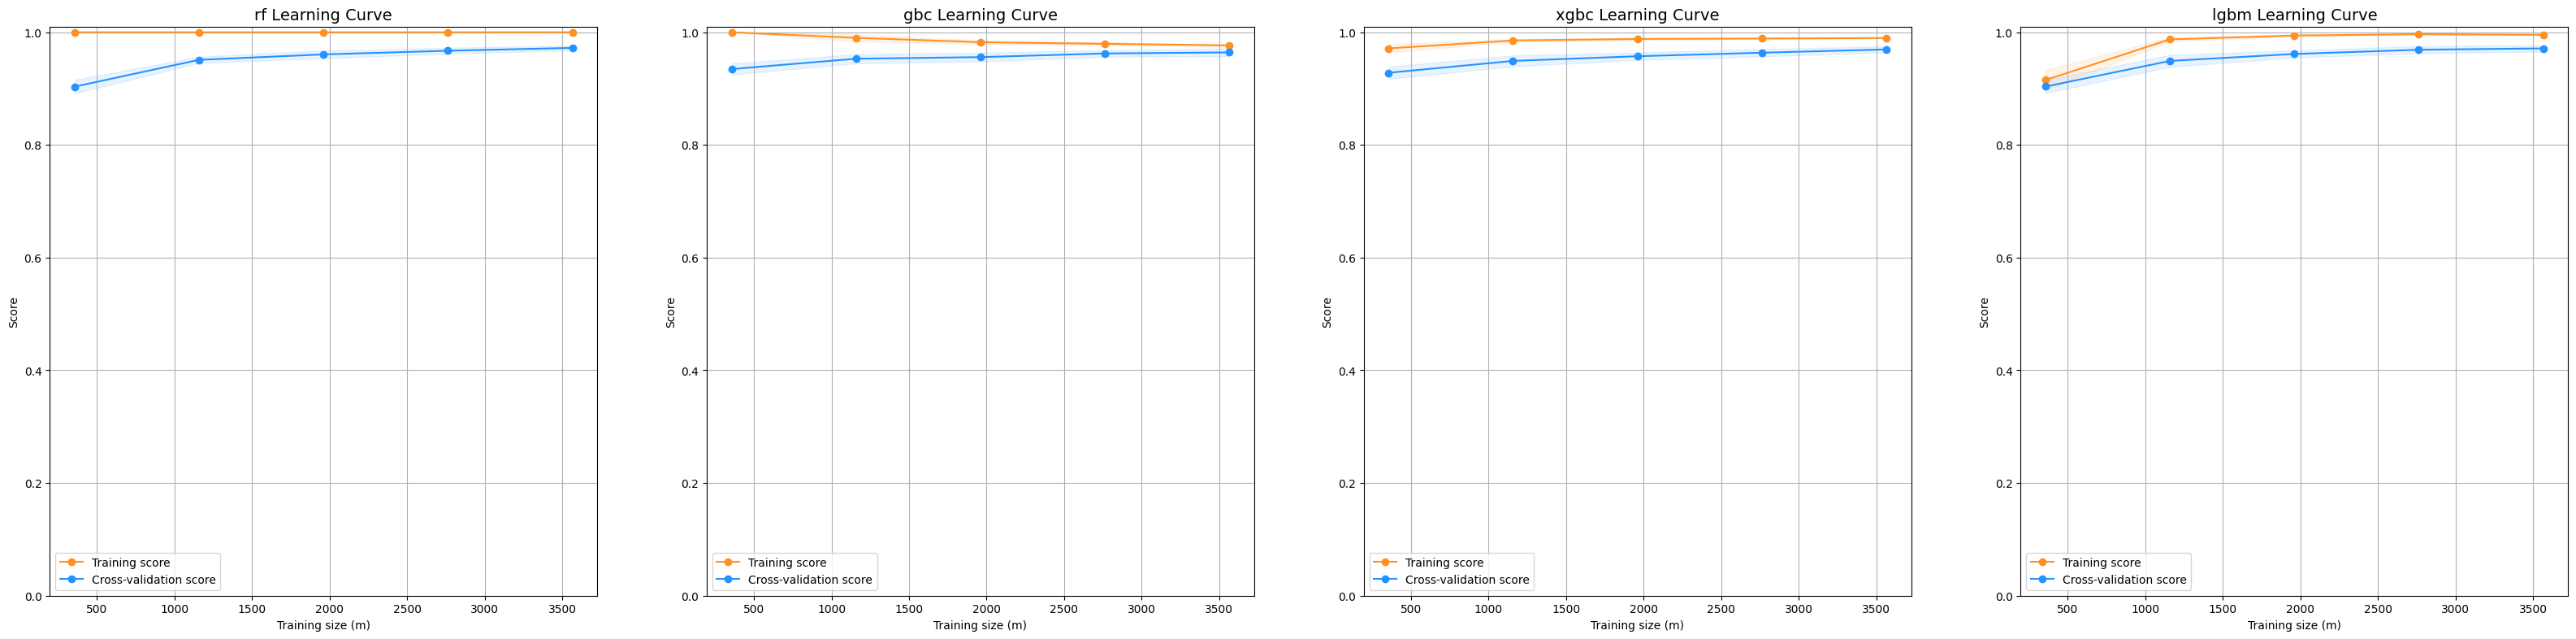

In [100]:
# Example Usage
model_size = len(ensemble_models)
rs, cs = (model_size//4+1, 4 ) if model_size >= 4 else (model_size//2+1, 2)
lcs_params = {
    "cv" : ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    "model_size": model_size,
    "rs":rs,
    "cs":cs,
    "figsize" : (cs*10,rs*10),
    "ylim" : (0.0, 1.01)
}

lc_plot  = get_learning_curve_stats(ensemble_models, X_train, y_train,  **lcs_params)

## (4) Final Model

### Top models

In [101]:
# lin_results, lin_metric_summary
# lin_reg_results, lin_reg_metric_summary
# non_lin_results, non_lin_metric_summary
# ensemble_results, ensemble_metric_summary

In [102]:
#all_results = [lin_results, lin_reg_results, non_lin_results, ensemble_results]

In [103]:
#lin_models = pd.concat([lin_metric_summary, lin_reg_metric_summary])
#lin_models = lin_models.sort_values(by=['MSE'], ascending=True)
#lin_models

In [104]:
non_linear_model = pd.concat([non_lin_metric_summary, ensemble_metric_summary])
non_linear_model = non_linear_model.sort_values(by=['accuracy','f1_score'],  ascending=False)
non_linear_model

,accuracy,precision,recall,f1_score,clf_report
rf,0.98296,0.98296,0.98296,0.98296,"{'0': {'precision': 0.9807497467071935, 'recal..."
cb,0.98296,0.98296,0.98296,0.98296,"{'0': {'precision': 0.9817258883248731, 'recal..."
loj_reg,0.981166,0.981166,0.981166,0.981166,"{'0': {'precision': 0.984646878198567, 'recall..."
lgbm,0.975785,0.975785,0.975785,0.975785,"{'0': {'precision': 0.9825641025641025, 'recal..."
xgbc,0.974888,0.974888,0.974888,0.974888,"{'0': {'precision': 0.9815573770491803, 'recal..."
gbc,0.967713,0.967713,0.967713,0.967713,"{'0': {'precision': 0.9707070707070707, 'recal..."
dt,0.962332,0.962332,0.962332,0.962332,"{'0': {'precision': 0.979296066252588, 'recall..."
knn,0.925561,0.925561,0.925561,0.925561,"{'0': {'precision': 0.9210275927687916, 'recal..."


In [105]:
non_linear_model.index

Index(['rf', 'cb', 'loj_reg', 'lgbm', 'xgbc', 'gbc', 'dt', 'knn'], dtype='object')

### Final Model

#### Greedy Selection

In [106]:
best_model_name = non_linear_model.iloc[0].name
best_model_name

'rf'

In [107]:
tuned_model, best_params = None, None
for results in [ non_lin_results, ensemble_results]:
  if best_model_name in results:
      tuned_model = results[best_model_name]["tune_results"]["tuned_model"]
      best_params = results[best_model_name]["tune_results"]["best_params"]

In [108]:
tuned_model.score(X_test, y_test)

0.9829596412556054

# (F) Saving & Downloading the model

### Saving the model

In [119]:
import pickle
model_save_path = 'rf_model.sav'
pickle.dump(tuned_model, open(model_save_path, 'wb'))

### Loading the model

In [111]:
loaded_model = pickle.load(open(model_save_path, 'rb'))

In [112]:
loaded_model.score(X_test, y_test)

0.9829596412556054

### Zipping the model
```python
import os 
zip_dst, src = f"{model_save_path}.zip", model_save_path
os.system(f"zip -r {zip_dst} {src}" )
```

### Downloading the model

In [113]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# (G) Deployment as App

## APP (loading from file)

### Declerations & Util Funcs

In [114]:
import os
if os.system("pip freeze | grep gradio==") != 0: os.system("pip install gradio")
import gradio as gr

In [121]:
import pickle
import re
import string
import numpy as np
import nltk
import pandas as pd
import sklearn
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


# File Paths
model_path = 'rf_model.sav' 
bow_vectorizer_path = "vectorizer"
tfidf_path = "tfidf_transformer"

# Loading the files
model = pickle.load(open(model_path, 'rb'))
bow_vectorizer = pickle.load(open(bow_vectorizer_path, 'rb'))
tfidf_transformer = pickle.load(open(tfidf_path, 'rb'))
nltk.download("stopwords")

labels = ["not spam", "spam"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
def text_preprocessing(text):

    # getting the stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # selecting non puction words
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # clearning and joining the words to create text
    clean_text = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    
    return clean_text

def vector_transformation(sentence):
  return bow_vectorizer.transform(sentence)
def tfidf_transformation(bow):
  return tfidf_transformer.transform(bow)

def predict(text):

  # preparing the input into convenient form
  sentence = text_preprocessing(text)
  
  # converting the text into numerical representation
  bow = bow_vectorizer.transform([sentence])
  features = tfidf_transformation(bow)

  # prediction
  probabilities = model.predict_proba(features) #.predict(features)
  probs = probabilities.flatten()

  # output form
  results = {l : np.round(p, 3) for l, p in zip(labels, probs)}

  return results

In [123]:
ex_text = "It is perfect, wonderfull, good, well"
predict(ex_text)

{'not spam': 1.0, 'spam': 0.0}

### Declerating the components

In [124]:
Examples = [
    "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
    "Dear John, thank you for submitting your application for the open position. We appreciate your interest and will be in touch soon regarding next steps",
    "Hi Sarah, just wanted to follow up on our meeting last week and see if you had any further questions or concerns. Let me know if there's anything else I can help you with.",
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "Congratulations! You have been selected to receive a free trip to the Bahamas. To claim your prize, simply click on the link below and fill out the registration form.",
    "URGENT: Your account has been compromised. Please click on the link below to reset your password and secure your account.",
]

### Launching the demo app

In [125]:
import gradio as gr
# Creating application
gr.Interface(predict, "text", "label", examples = Examples).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>